In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nia = pd.read_excel('sampling_nia.xlsx')
nia.head()

,login_id,description,speed,device_name,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,ptt,zone,resolution_code ( target variable ),predicted_resolution_code
0,0,0.0,50Mbps,BAT_V1032_F999_0351,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,?
1,1,1.0,100Mbps,KLC_G002,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,?
2,2,2.0,50Mbps,SLB_G003,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,FDP_FASC_Connector_Replaced,?
3,3,2.0,50Mbps,BAT_V1064_0001,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,?
4,4,3.0,30Mbps,SGB_G006,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,?


In [4]:
print(nia.shape)

(1459, 14)


In [5]:
print(nia['resolution_code ( target variable )'].unique())

['Visit Charge Only' 'Advise Customer' 'FDP_FASC_Connector_Replaced'
 'Advise TMUC' 'TM_FTB FASC connector replaced'
 'FOC_OFM Pull n Resplice Cable' 'CCP_CPE Replaced'
 'TM_FTB Drop Fiber replaced' 'PG_Config_Changed' 'Jumper Changed'
 'Normalise_CPE Connection' 'VDSL_Reset' 'TMCPE Replaced' 'Port Change'
 'D/S Fiber cable replaced' 'VDSL_Config_Changed' 'Control card reset'
 'TM_CPE_IW_RJ11 Replaced' 'Int._Wiring Replaced/Repaired' 'ONU_Reset'
 'D/S Fiber cable restored' 'Resolved_By_NOVA' 'Cable_Reconnected'
 'STB_Reset' 'PG_Reset' 'Patching_Fiber Normalised' 'Reboot_STB'
 'Power Adaptor Replaced' 'ONU_Config_Changed' 'D/S Cable Replaced'
 'FOC_D/S cable replaced' 'AdviseTMUCtoProvide full info' 'Port Reset'
 'Configure Customer Account' 'Reassign Port' 'Connector_Replaced'
 'D/S Pair Changed' 'Remove illegal Connection' 'TM_CPE_IW_RJ45 Replaced'
 'VLAN changed' 'ODF Patch_Opt Connctr.Cleaned' 'D/S Pair Restored'
 'Customer CPE Own Configuration' 'Normalise_Power AdptrConnct.'
 'DP_

In [6]:
print(len(nia['resolution_code ( target variable )'].unique()))

47


In [7]:
print(nia.groupby('resolution_code ( target variable )').size())

resolution_code ( target variable )
Advise Customer                   231
Advise TMUC                       449
AdviseTMUCtoProvide full info      10
CCP_CPE Replaced                   12
Cable_Reconnected                  29
Configure Customer Account          2
Connector_Replaced                 12
Control card reset                 13
Customer CPE Own Configuration      2
Customer_Reconnect CPE              2
D/S Cable Replaced                  4
D/S Cable Restored                  2
D/S Fiber cable replaced          102
D/S Fiber cable restored           15
D/S Pair Changed                    6
D/S Pair Restored                   2
DP_Re-jumper                        4
FDP_FASC_Connector_Replaced        34
FOC_D/S cable replaced             10
FOC_OFM Pull n Resplice Cable      10
Int._Wiring Replaced/Repaired       9
Jumper Changed                     18
Normalise_CPE Connection           57
Normalise_Power AdptrConnct.        2
ODF Patch_Opt Connctr.Cleaned       3
ONU_Config_Cha

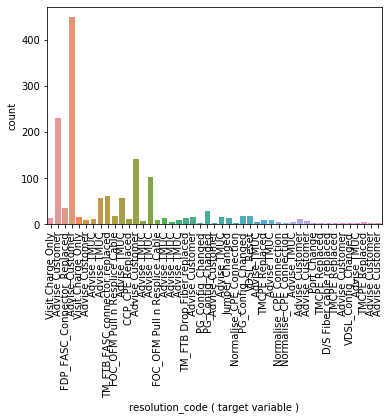

In [8]:
import seaborn as sns
sns.countplot(nia['resolution_code ( target variable )'],label="Count").set_xticklabels(nia['resolution_code ( target variable )'], rotation=90)
plt.show()

In [9]:
print(nia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   login_id                             1459 non-null   int64  
 1   description                          1453 non-null   float64
 2   speed                                1459 non-null   object 
 3   device_name                          1459 non-null   object 
 4   exchange_id                          1459 non-null   object 
 5   btu_type                             1459 non-null   object 
 6   created_by                           1459 non-null   object 
 7   closed_by                            1459 non-null   object 
 8   btu_platform                         1459 non-null   object 
 9   symptom_error_code                   1459 non-null   object 
 10  ptt                                  1459 non-null   object 
 11  zone                          

In [10]:
# remove null values from dataset
nia_copy = nia.copy()
nia_copy = nia_copy.fillna(nia_copy['description'].value_counts().index[0])
print(nia_copy.isnull().sum())
print(nia_copy.info())

login_id                               0
description                            0
speed                                  0
device_name                            0
exchange_id                            0
btu_type                               0
created_by                             0
closed_by                              0
btu_platform                           0
symptom_error_code                     0
ptt                                    0
zone                                   0
resolution_code ( target variable )    0
predicted_resolution_code              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   login_id                             1459 non-null   int64  
 1   description                          1459 non-null   float64
 2   speed                                

In [11]:
# convert login & description into string 
nia_copy['login_id'] = nia_copy['login_id'].astype(str)
nia_copy['description'] = nia_copy['description'].astype(str)
print(nia_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   login_id                             1459 non-null   object
 1   description                          1459 non-null   object
 2   speed                                1459 non-null   object
 3   device_name                          1459 non-null   object
 4   exchange_id                          1459 non-null   object
 5   btu_type                             1459 non-null   object
 6   created_by                           1459 non-null   object
 7   closed_by                            1459 non-null   object
 8   btu_platform                         1459 non-null   object
 9   symptom_error_code                   1459 non-null   object
 10  ptt                                  1459 non-null   object
 11  zone                                 1459 n

In [12]:
# drop columns (reduce dimensionalty) irrelevant/uninsightful for training
nia_copy.drop(['ptt', 'zone', 'predicted_resolution_code'], axis=1, inplace=True)
nia_copy.head()

,login_id,description,speed,device_name,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,resolution_code ( target variable )
0,0,0.0,50Mbps,BAT_V1032_F999_0351,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,Visit Charge Only
1,1,1.0,100Mbps,KLC_G002,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,Advise Customer
2,2,2.0,50Mbps,SLB_G003,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,FDP_FASC_Connector_Replaced
3,3,2.0,50Mbps,BAT_V1064_0001,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,Advise Customer
4,4,3.0,30Mbps,SGB_G006,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,Visit Charge Only


In [13]:
nia_dataset = nia_copy.values
X = nia_dataset[:, :-1]
#X = X.astype(str)
y = nia_dataset[:,-1]

In [14]:
print(X.shape)
print(y.shape)

(1459, 10)
(1459,)


In [15]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1167, 10) (1167,)
Test (292, 10) (292,)


In [16]:
print(X_train)
print(y_train)

[['525' '346.0' '50Mbps' ... 'X1002069' 'HUAWEI' 'Line Disconnect']
 ['441' '2.0' '50Mbps' ... 'WFSMS_USER' 'HUAWEI' 'Line Disconnect']
 ['190' '105.0' '10Mbps' ... 'X1110490' 'HUAWEI' 'Line Disconnect']
 ...
 ['625' '481.0' '10Mbps' ... 'X1001589' 'HUAWEI' 'Line Disconnect']
 ['203' '2.0' '100Mbps' ... 'X1110490' 'HUAWEI' 'Slow Browsing']
 ['558' '465.0' '50Mbps' ... 'X1110490' 'HUAWEI' 'Line Disconnect']]
['Advise TMUC' 'Power Adaptor Replaced' 'TMCPE Replaced' ...
 'Advise Customer' 'Advise TMUC' 'D/S Fiber cable replaced']


In [17]:
# encode data 
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode inputs
X_train_enc = oe.fit_transform(X_train)
X_test_enc = oe.fit_transform(X_test)

#encode output
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

In [19]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 9189.936885
Feature 1: 4083.958234
Feature 2: 61.659777
Feature 3: 12782.455556
Feature 4: 596.560852
Feature 5: 60.037622
Feature 6: 5878.312438
Feature 7: 720.449387
Feature 8: 72.252484
Feature 9: 48.592107


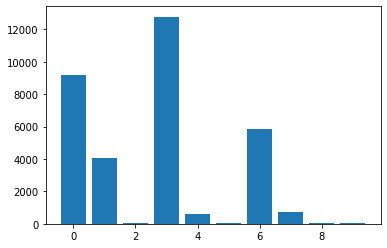

In [20]:
# plot the scores
from matplotlib import pyplot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [23]:
# load various classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# generate models
gnb = GaussianNB()
# lr = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='auto')
# lrcv = LogisticRegressionCV(cv=5, random_state=0)
knn = KNeighborsClassifier()

# fit models
gnb.fit(X_train_fs, y_train_enc)
# lr.fit(X_train_fs, y_train_enc)
# lrcv.fit(X_train_fs, y_train_enc)
knn.fit(X_train_fs, y_train_enc)

# test models
yhat_gnb = gnb.predict(X_test_fs)
# yhat_lr = lr.predict(X_test_fs)
# yhat_lrcv = lrcv.predict(X_test_fs)
yhat_knn = knn.predict(X_test_fs)

In [24]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy_gnb = accuracy_score(y_test_enc, yhat_gnb)
# accuracy_lr = accuracy_score(y_test_enc, yhat_lr)
# accuracy_lrcv = accuracy_score(y_test_enc, yhat_lrcv)
accuracy_knn = accuracy_score(y_test_enc, yhat_knn)

print('GNB Accuracy: %.2f' % (accuracy_gnb*100))
# print('LR Accuracy: %.2f' % (accuracy_lr*100))
# print('LRCV Accuracy: %.2f' % (accuracy_lrcv*100))
print('KNN Accuracy: %.2f' % (accuracy_knn*100))

GNB Accuracy: 10.62
KNN Accuracy: 19.18


In [25]:
# encode all input data
X_enc = oe.fit_transform(X)

# test models on all input data
y_gnb = gnb.predict(X_enc)
# y_lr = lr.predict(X_enc)
# y_lrcv = lrcv.predict(X_enc)
y_knn = knn.predict(X_enc)

In [26]:
print(X.shape)
print(X_enc.shape)

(1459, 10)
(1459, 10)


In [27]:
# encode all output data
y_enc = le.fit_transform(y)
print(y.shape)
print(y_enc.shape)

(1459,)
(1459,)


In [28]:
# evaluate predictions on all data

accuracy_gnb_all = accuracy_score(y_enc, y_gnb)
# accuracy_lr_all = accuracy_score(y_enc, y_lr)
# accuracy_lrcv_all = accuracy_score(y_enc, y_lrcv)
accuracy_knn_all = accuracy_score(y_enc, y_knn)

print('GNB Accuracy: %.2f' % (accuracy_gnb_all*100))
# print('LR Accuracy: %.2f' % (accuracy_lr_all*100))
# print('LRCV Accuracy: %.2f' % (accuracy_lrcv_all*100))
print('KNN Accuracy: %.2f' % (accuracy_knn_all*100))

GNB Accuracy: 9.94
KNN Accuracy: 35.02


In [30]:
predicted_resolution_code = le.inverse_transform(y_knn)

In [31]:
nia['predicted_resolution_code'] = predicted_resolution_code
nia

,login_id,description,speed,device_name,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,ptt,zone,resolution_code ( target variable ),predicted_resolution_code
0,0,0.0,50Mbps,BAT_V1032_F999_0351,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,STB_Reset
1,1,1.0,100Mbps,KLC_G002,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,Advise Customer
2,2,2.0,50Mbps,SLB_G003,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,FDP_FASC_Connector_Replaced,Advise Customer
3,3,2.0,50Mbps,BAT_V1064_0001,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,Cable_Reconnected
4,4,3.0,30Mbps,SGB_G006,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,Advise Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,349,2.0,50Mbps,SGB_G001,SGB,ONU,X1111417,X1403100,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,PG_Config_Changed,ONU_Reset
1455,547,633.0,50Mbps,SGB_G005,SGB,ONU,X1708522,X1401025,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,PG_Config_Changed,Advise TMUC
1456,483,634.0,50Mbps,BAT_G008,BAT,ONU,X1509227,WFSMS_USER,HUAWEI,Frequent disconnection,SELANGOR TIMUR 1,ZONE KEPONG & BATU,TMCPE Replaced,TM_CPE_IW_RJ45 Replaced
1457,354,635.0,50Mbps,SGB_V1050_0020,SGB,VDSL2 MODEM,X1512100,X1403100,ZTE,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise TMUC,Advise TMUC


In [32]:
nia.to_excel("predicted_nia.xlsx")

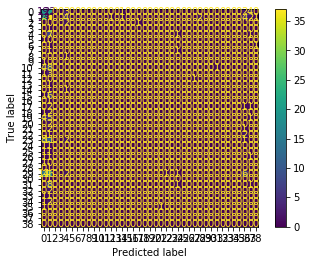

<Figure size 1440x1440 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_enc, y_test_enc)
plt.figure(figsize=(20, 20))
plt.savefig('confusion.png', bbox_inches='tight')
plt.show()

[[ 0  1  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


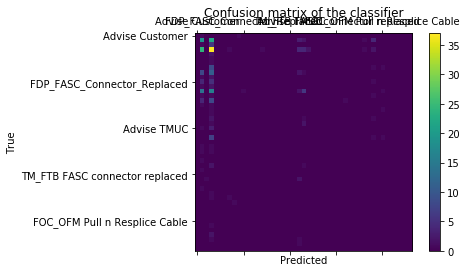

<Figure size 1440x1440 with 0 Axes>

In [54]:
from sklearn.metrics import confusion_matrix

labels = nia['resolution_code ( target variable )'].unique()
cm = confusion_matrix(y_test.tolist(), le.inverse_transform(yhat_knn).tolist(), labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20, 20))
plt.show()